# Support Vector Machine (SVM) on the same case

## 1. Still import data and libraries

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split as tts
# datasets
import sklearn.datasets as ds
# preprocessing modules
from sklearn.preprocessing import StandardScaler as sc
# SVM
from sklearn.svm import SVC
# Matplotlib
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap
from matplotlib import colors as mcolors
# get data in
iris = ds.load_iris()
x = iris.data[:,[2,3]]
y = iris.target
# separate training and test sets
xtrain,xtest,ytrain,ytest = tts (x, y, test_size=0.3, random_state=0)
# let's standardize everything based upon training set
sc0 = sc ()
sc0.fit (xtrain)
xtr_std = sc0.transform (xtrain)
xte_std = sc0.transform (xtest)

In [37]:
type(xtr_std)

numpy.ndarray

## 2. Train the model

In [38]:
svc = SVC(C=100.0, kernel='linear')
svc.fit(xtr_std,ytrain)
ypd = svc.predict(xte_std)
print ("accuracy: ", svc.score(xte_std,ytest))

accuracy:  0.977777777778


## 3. Visualize the classifier

<class 'dict'>
['#000080', '#4682B4', '#48D1CC']


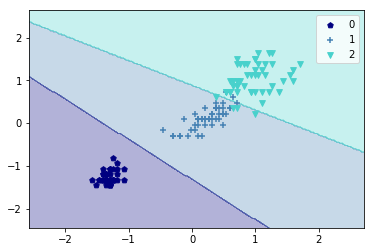

In [83]:
def plot_dc_bd (x, y, classifier, test_idx=None, num=200):
    markers=('p','+','v','h','s')
    max_classes = 100
    colors1 = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
    print (type (colors1))
    by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                    for name, color in colors1.items())
    sorted_names = [name for hsv, name in by_hsv]
    colors=[]
    inds = np.random.randint(0,len(sorted_names)-1,len(np.unique(y)))
    for i in range(0,len(np.unique(y))):
        colors.append (colors1[sorted_names[inds[i]]])
    print (colors)
#     for ind,val in enumerate(sorted_names):
#         colors.append (colors1[val])
#     colors=('magenta','DarkGreen','DarkCyan','blue','red')
    cmp=ListedColormap(colors[:len(np.unique(y))])
    xmin1,xmax1=x[:,0].min()-1.0,x[:,0].max()+1.0
    xmin2,xmax2=x[:,1].min()-1.0,x[:,1].max()+1.0
    [xx1,xx2]=np.meshgrid(np.linspace(xmin1,xmax1,num),
                          np.linspace(xmin2,xmax2,num))
    z0=classifier.predict (np.array([xx1.ravel(),xx2.ravel()]).T)
    z=np.reshape(z0,
                 np.shape(xx1))
    plt.contourf(xx1,xx2,z,cmap=cmp,alpha=0.3)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
#     plt.scatter (x[:,0],x[:,1],marker='o',
#                  label='Data',edgecolor='r',
#                  facecolor='none',s=51)

    for idx, val in enumerate(np.unique(y)):
        plt.scatter(x[y==val,0],x[y==val,1],c=colors[idx],
                    marker=markers[idx],label=str(val),s=33)
        #print ("id ",idx,", val ",x[y==val,0])
    plt.legend(loc=0)
    plt.show()

# now let's see the pic
plot_dc_bd(np.concatenate((xtr_std,xte_std)),
           np.concatenate((ytrain,ytest)),svc)

## 4. How is the penalty affecting the results?
There is no free lunch. Adding penalties, indeed, conquers the issue of high variance, but over-penalization could, on the other hand, brings the high bias issue. We will explore this.

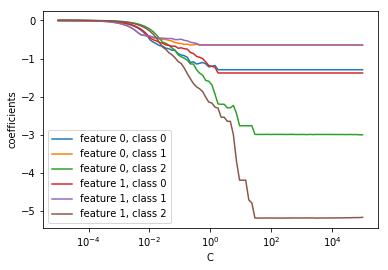

In [84]:
coefs, params, all_coef = [], [], [[],[]]
classes = len(np.unique(y))
sample_size = 100
all_c = np.linspace (-5., 5., sample_size)
all_coef = np.zeros ((2, classes, sample_size))

for ind, val in np.ndenumerate (all_c):
    svc0 = SVC (C=10.**val, kernel='linear', random_state=0)
    params.append (10.**val)
    svc0.fit (xtr_std, ytrain)
    for i in range (0, classes):
        for j in range(0, 2):
            all_coef[j][i][ind[0]] = svc0.coef_[i][j]
params = np.array (params)
for i in range (0, 2):
    for j in range (0, classes):
        label='feature '+str(i) + ', class ' + str(j)
        plt.plot (params, all_coef[i][j],label=label)
        plt.xscale ('log')
plt.legend(loc=0)
plt.xlabel ('C')
plt.ylabel ('coefficients')
plt.show ()